___


___
# Nationwide Insurance – Technical Assessment

Aytekin YILDIZHAN

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the TRAIN_SET_2021.csv file into a pandas dataframe.

# 1) Conduct exploratory data analysis of train set.

In [31]:
train = pd.read_csv('TRAIN_SET_2021.csv')
test = pd.read_csv('TEST_SET_2021.csv')

In [32]:
print(len(train))

print(len(train.RESTAURANT_SERIAL_NUMBER.unique()))


print(len(test))

train.columns
# Therefore RESTAURANT_SERIAL_NUMBER column is unique

15673
15673
7505


Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CURRENT_DEMERITS', 'CURRENT_GRADE',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TIME', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW'],
      dtype='object')

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object 
 1   RESTAURANT_PERMIT_NUMBER          15673 non-null  object 
 2   RESTAURANT_NAME                   15608 non-null  object 
 3   RESTAURANT_LOCATION               15473 non-null  object 
 4   RESTAURANT_CATEGORY               15543 non-null  object 
 5   ADDRESS                           15603 non-null  object 
 6   CITY                              15437 non-null  object 
 7   STATE                             15464 non-null  object 
 8   ZIP                               15614 non-null  object 
 9   CURRENT_DEMERITS                  15457 non-null  float64
 10  CURRENT_GRADE                     15365 non-null  object 
 11  EMPLOYEE_COUNT                    15580 non-null  float64
 12  MEDI

In [34]:
train.describe()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION
count,15457.000000,15580.000000,15639.000000,15376.000000,1.546100e+04,15588.000000,15612.000000
mean,5.239552,22.289345,28.015118,4.030491,7.263423e+02,171.871953,179.269088
std,13.895923,892.830909,4.901565,2.022737,6.976831e+04,80.079188,77.347049
min,-8.000000,-7.000000,14.000000,0.227197,1.000000e+00,2.000000,4.000000
25%,0.000000,8.000000,24.601414,2.551504,2.020000e+02,204.000000,209.000000
50%,5.000000,14.000000,27.968247,3.693207,2.060000e+02,211.000000,215.000000
75%,8.000000,21.000000,31.409235,5.138718,2.110000e+02,215.000000,227.000000
max,1214.000000,111447.000000,49.614076,24.399347,8.675309e+06,302.000000,310.000000


In [35]:
train.isnull().sum().sum()

4027

In [36]:
train.isnull().sum().sort_values(ascending=False)
# All null values.

CURRENT_GRADE                       308
MEDIAN_EMPLOYEE_TENURE              297
SECOND_VIOLATION_TYPE               267
INSPECTION_DEMERITS                 254
CITY                                236
INSPECTION_TYPE                     221
CURRENT_DEMERITS                    216
FIRST_VIOLATION                     212
STATE                               209
RESTAURANT_LOCATION                 200
INSPECTION_TIME                     183
THIRD_VIOLATION_TYPE                173
NUMBER_OF_VIOLATIONS                169
VIOLATIONS_RAW                      165
FIRST_VIOLATION_TYPE                146
RESTAURANT_CATEGORY                 130
RECORD_UPDATED                      119
EMPLOYEE_COUNT                       93
SECOND_VIOLATION                     85
ADDRESS                              70
RESTAURANT_NAME                      65
THIRD_VIOLATION                      61
ZIP                                  59
NEXT_INSPECTION_GRADE_C_OR_BELOW     40
MEDIAN_EMPLOYEE_AGE                  34


Text(0.5, 1.0, 'Counts of Missing Value')

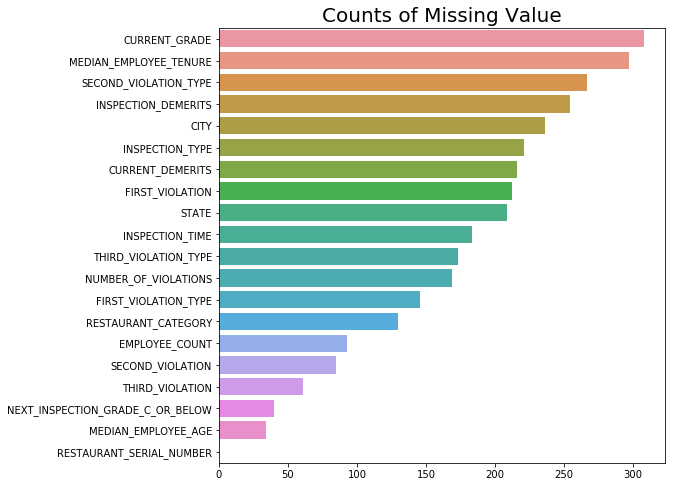

In [70]:
plt.figure(figsize=(8,8))
sns.barplot(x = train.isnull().sum().sort_values(ascending=False),y = train.isnull().sum().sort_values(ascending=False).index)
plt.title("Counts of Missing Value",size=20)

In [71]:
train.NEXT_INSPECTION_GRADE_C_OR_BELOW.value_counts()
# -3, Goat, 7, 9, 4 and 3 are outliers

0       13143
1        2484
-3          1
Goat        1
7           1
9           1
4           1
3           1
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

In [40]:
train.CURRENT_GRADE.value_counts()
# After N value, there are outliers.

A             14915
B               215
C               104
X                75
O                32
N                13
7                 2
K                 1
A+                1
U                 1
I                 1
EIEIO             1
UPN               1
VPN               1
NASA              1
.\<><1@#&|        1
Name: CURRENT_GRADE, dtype: int64

In [41]:
train.FIRST_VIOLATION_TYPE.value_counts()
# According to inspection report, we just consider critical, major, non major and Imminent Health Hazard

Critical                  7194
Major                     6735
Non-Major                 1588
Imminent Health Hazard       3
Extra Crispy                 1
Major-ish                    1
To Infinity and Beyond       1
Not Sure                     1
Radical                      1
Excellent                    1
Bullwinkle                   1
Name: FIRST_VIOLATION_TYPE, dtype: int64

In [42]:
train.SECOND_VIOLATION_TYPE.value_counts()
# According to inspection report, we just consider critical, major, non major and Imminent Health Hazard

Major                     7908
Non-Major                 4507
Critical                  2984
Imminent Health Hazard       5
Supercritical                1
Kitchen Nightmares           1
Name: SECOND_VIOLATION_TYPE, dtype: int64

In [43]:
train.THIRD_VIOLATION_TYPE.value_counts()
# According to inspection report, we just consider critical, major, non major and Imminent Health Hazard

Major                     7310
Non-Major                 7286
Critical                   867
Imminent Health Hazard      37
Name: THIRD_VIOLATION_TYPE, dtype: int64

In [44]:
train.RESTAURANT_CATEGORY.value_counts()
# we can use this info.

Restaurant                     9316
Bar / Tavern                   2369
Snack Bar                      1285
Special Kitchen                1158
Buffet                          228
Portable Unit                   199
Pantry                          165
Meat/Poultry/Seafood            140
Food Trucks / Mobile Vendor      99
Caterer                          71
Banquet Kitchen                  65
Kitchen Bakery                   60
Bakery Sales                     47
Garde Manger                     47
Vegetable Prep                   44
Produce Market                   33
Institutional Food Service       32
Concessions                      29
Confection                       26
Elementary School Kitchen        20
Grocery Store Sampling           19
Banquet Support                  16
Portable Bar                     15
Childcare Kitchens               15
Barbeque                         14
Gastropub                         9
Gas Station                       8
Main Kitchen                

In [45]:
train.VIOLATIONS_RAW
# drop

0             2,042,153,022,955
1           214,216,229,230,233
2                   202,215,233
3                   214,230,233
4                   214,230,233
                  ...          
15668             2,19,31,36,37
15669       213,225,230,231,233
15670    20,921,321,729,092,900
15671               214,215,226
15672               214,227,230
Name: VIOLATIONS_RAW, Length: 15673, dtype: object

In [46]:
# drop some irrelevant columns

In [47]:
train.drop('RESTAURANT_PERMIT_NUMBER',axis=1,inplace=True)
train.drop('VIOLATIONS_RAW',axis=1,inplace=True)
train.drop('RESTAURANT_NAME',axis=1,inplace=True)
train.drop('RESTAURANT_LOCATION',axis=1,inplace=True)
train.drop('ADDRESS',axis=1,inplace=True)
#train.drop('CITY',axis=1,inplace=True)
#train.drop('STATE',axis=1,inplace=True)
train.drop('ZIP',axis=1,inplace=True)
train.drop('RECORD_UPDATED',axis=1,inplace=True)
train.drop('LAT_LONG_RAW',axis=1,inplace=True)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object 
 1   RESTAURANT_CATEGORY               15543 non-null  object 
 2   CITY                              15437 non-null  object 
 3   STATE                             15464 non-null  object 
 4   CURRENT_DEMERITS                  15457 non-null  float64
 5   CURRENT_GRADE                     15365 non-null  object 
 6   EMPLOYEE_COUNT                    15580 non-null  float64
 7   MEDIAN_EMPLOYEE_AGE               15639 non-null  float64
 8   MEDIAN_EMPLOYEE_TENURE            15376 non-null  float64
 9   INSPECTION_TIME                   15490 non-null  object 
 10  INSPECTION_TYPE                   15452 non-null  object 
 11  INSPECTION_DEMERITS               15419 non-null  object 
 12  FIRS

In [49]:
# identifying the columns

In [50]:
identifier_feature = ['RESTAURANT_SERIAL_NUMBER']
continuous_features = ['MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE']
nominal_features = ['RESTAURANT_CATEGORY', 'CITY', 'STATE', 'CURRENT_GRADE',
                    'INSPECTION_TYPE','FIRST_VIOLATION', 'SECOND_VIOLATION',
                    'THIRD_VIOLATION','FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE']
numeric_feactures = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'INSPECTION_DEMERITS',
                     'NUMBER_OF_VIOLATIONS']
target = ['NEXT_INSPECTION_GRADE_C_OR_BELOW']
selected_features = nominal_features + numeric_feactures + continuous_features + target

In [51]:
# Train_Set and Test_Set import, select desired features, and preprocessing
# Train_Set import

df_trn = pd.read_csv('TRAIN_SET_2021.csv', encoding = "ISO-8859-1", usecols = identifier_feature + selected_features, low_memory = False)

df_trn = df_trn.reindex(sorted(df_trn.columns), axis=1)
df_trn['ds_type'] = 'Train'

In [52]:
df_trn

,CITY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,FIRST_VIOLATION,FIRST_VIOLATION_TYPE,INSPECTION_DEMERITS,INSPECTION_TYPE,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NEXT_INSPECTION_GRADE_C_OR_BELOW,NUMBER_OF_VIOLATIONS,RESTAURANT_CATEGORY,RESTAURANT_SERIAL_NUMBER,SECOND_VIOLATION,SECOND_VIOLATION_TYPE,STATE,THIRD_VIOLATION,THIRD_VIOLATION_TYPE,ds_type
0,Las Vegas,0.0,A,25.0,204.0,Critical,11,Routine Inspection,27.959983,13.004886,0,4,Snack Bar,DA1117270,215.0,Major,Nevada,302.0,Imminent Health Hazard,Train
1,Las Vegas,3.0,A,7.0,214.0,Major,9,Routine Inspection,27.719365,3.922086,0,5,Restaurant,DA1014948,216.0,Major,Nevada,229.0,Non-Major,Train
2,Las Vegas,8.0,A,23.0,202.0,Critical,9,Routine Inspection,26.442637,10.312777,1,3,Restaurant,DA0861994,215.0,Major,Nevada,233.0,Non-Major,Train
3,Las Vegas,0.0,A,14.0,214.0,Major,5,Routine Inspection,33.988293,4.163975,0,3,Elementary School Kitchen,DA0896719,230.0,Non-Major,Nevada,233.0,Non-Major,Train
4,Las Vegas,0.0,A,10.0,214.0,Major,5,Routine Inspection,21.980282,13.462786,0,NaN,Bar / Tavern,DA1031041,230.0,Non-Major,Nevada,233.0,Non-Major,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Las Vegas,1.0,A,24.0,2.0,Critical,10,Routine Inspection,27.265494,1.858442,0,5,Restaurant,DA0127918,19.0,Non-Major,Nevada,31.0,Non-Major,Train
15669,North Las Vegas,6.0,A,21.0,213.0,Major,7,Routine Inspection,18.216549,6.797710,0,5,Restaurant,DA0895752,225.0,Non-Major,Nevada,230.0,Non-Major,Train
15670,Las Vegas,9.0,A,6.0,209.0,Critical,17,Routine Inspection,32.334711,2.341416,0,5,Restaurant,DA1074894,213.0,Major,Nevada,217.0,Major,Train
15671,Boulder City,3.0,A,11.0,214.0,Major,7,Routine Inspection,36.076705,1.278035,0,3,Snack Bar,DA1000307,215.0,Major,Nevada,226.0,Non-Major,Train


In [53]:
# test set import

df_tst = pd.read_csv('TEST_SET_2021.csv', encoding = "ISO-8859-1", low_memory = False)
df_tst[target] = "0"

# in test set, there is no NEXT_INSPECTION_GRADE_C_OR_BELOW column. 
# So all NEXT_INSPECTION_GRADE_C_OR_BELOW () columm is zero initially

df_tst = df_tst[identifier_feature + selected_features]
df_tst = df_tst.reindex(sorted(df_tst.columns), axis=1)

df_tst['ds_type'] = 'Test'

In [54]:
df_tst

,CITY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,FIRST_VIOLATION,FIRST_VIOLATION_TYPE,INSPECTION_DEMERITS,INSPECTION_TYPE,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NEXT_INSPECTION_GRADE_C_OR_BELOW,NUMBER_OF_VIOLATIONS,RESTAURANT_CATEGORY,RESTAURANT_SERIAL_NUMBER,SECOND_VIOLATION,SECOND_VIOLATION_TYPE,STATE,THIRD_VIOLATION,THIRD_VIOLATION_TYPE,ds_type
0,Las Vegas,6,A,3.000000,209.0,Critical,21,Routine Inspection,31.141933,3.542119,0,5,Special Kitchen,DA1050454,213,Major,Nevada,217,Major,Test
1,Las Vegas,0,A,18.598406,214.0,Major,8,Routine Inspection,26.839893,4.885881,0,4,Bar / Tavern,DA0986444,222,Major,Nevada,227,Non-Major,Test
2,Overton,8,A,5.730357,211.0,Major,15,Routine Inspection,31.202256,1.883055,0,6,Bar / Tavern,DA1284914,212,Major,Nevada,213,Major,Test
3,Las Vegas,0,A,15.075238,202.0,1,33,Re-inspection,36.656000,6.761476,0,11,Restaurant,DA1281903,206,Critical,Nevada,209,Critical,Test
4,Las Vegas,9,A,14.218813,213.0,Major,10,Routine Inspection,21.001225,6.601620,0,6,Restaurant,DA1004708,214,Major,Nevada,226,Non-Major,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,Las Vegas,0,A,15.230494,202.0,Critical,20,Routine Inspection,33.780673,4.008016,0,6,Restaurant,DA0922689,214,Major,Nevada,215,Major,Test
7501,Las Vegas,6,A,25.409139,214.0,Major,5,Re-inspection,31.688779,3.453527,0,3,Restaurant,DA1031095,229,Non-Major,Nevada,233,Non-Major,Test
7502,North Las Vegas,8,A,16.694861,13.0,Major,13,Routine Inspection,26.272563,3.070719,0,3,Portable Unit,DA0633450,28,Non-Major,Nevada,113,Major,Test
7503,Las Vegas,3,A,25.367641,212.0,Major,8,Routine Inspection,19.612605,6.637496,0,4,Bar / Tavern,DA0998980,214,Major,Nevada,231,Non-Major,Test


In [55]:
# Concatenate Train and Test set
df = df_trn.append(df_tst)

# Therefore all values will be preprocessing

In [56]:
df_trn.corr()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,FIRST_VIOLATION,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,SECOND_VIOLATION,THIRD_VIOLATION
CURRENT_DEMERITS,1.000000,0.002849,0.000432,0.001581,-0.001971,-0.005725,-0.006365
EMPLOYEE_COUNT,0.002849,1.000000,-0.000089,-0.000514,0.011422,0.004120,0.003804
FIRST_VIOLATION,0.000432,-0.000089,1.000000,0.003000,-0.006521,-0.014774,-0.014963
MEDIAN_EMPLOYEE_AGE,0.001581,-0.000514,0.003000,1.000000,0.000481,0.006360,0.005583
MEDIAN_EMPLOYEE_TENURE,-0.001971,0.011422,-0.006521,0.000481,1.000000,0.010183,0.011817
SECOND_VIOLATION,-0.005725,0.004120,-0.014774,0.006360,0.010183,1.000000,0.986996
THIRD_VIOLATION,-0.006365,0.003804,-0.014963,0.005583,0.011817,0.986996,1.000000


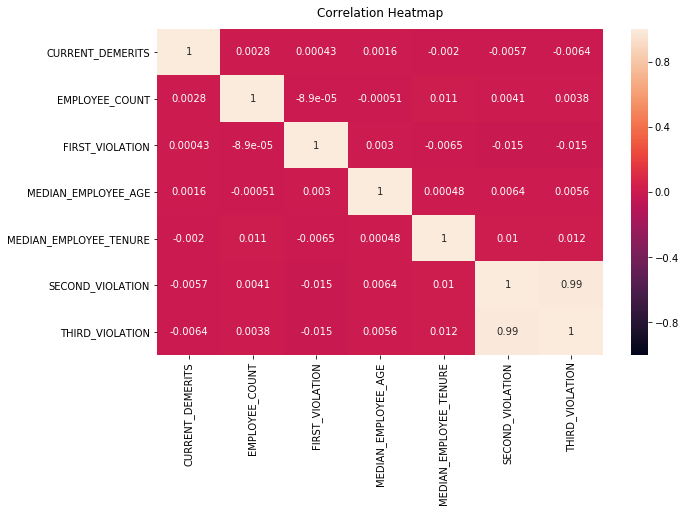

In [72]:
plt.figure(figsize=(10, 6))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_trn.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

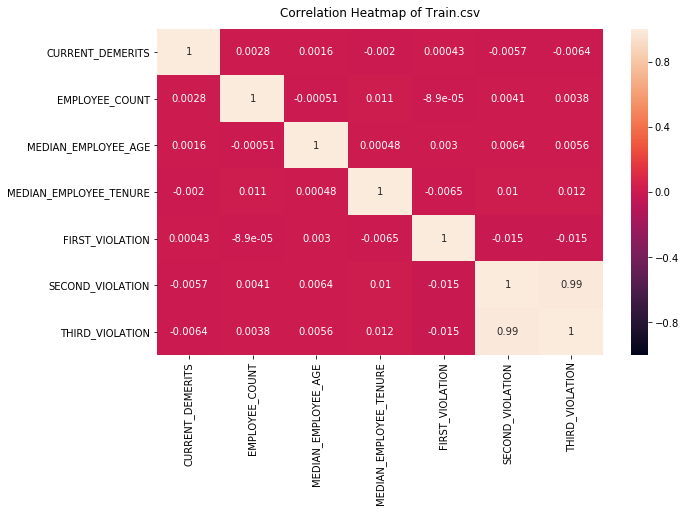

In [73]:
plt.figure(figsize=(10, 6))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap of Train.csv', fontdict={'fontsize':12}, pad=12);

# PREPROCESSING THE DATA

# We also use test_set.csv because test_set.csv and train_set.csv should be consistent with each other.

# In this section, we make assumptions.

In [561]:
df

,CITY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,FIRST_VIOLATION,FIRST_VIOLATION_TYPE,INSPECTION_DEMERITS,INSPECTION_TYPE,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NEXT_INSPECTION_GRADE_C_OR_BELOW,NUMBER_OF_VIOLATIONS,RESTAURANT_CATEGORY,RESTAURANT_SERIAL_NUMBER,SECOND_VIOLATION,SECOND_VIOLATION_TYPE,STATE,THIRD_VIOLATION,THIRD_VIOLATION_TYPE,ds_type
0,Las Vegas,0.0,A,25.000000,204.0,Critical,11,Routine Inspection,27.959983,13.004886,0,4,Snack Bar,DA1117270,215.0,Major,Nevada,302.0,Imminent Health Hazard,Train
1,Las Vegas,3.0,A,7.000000,214.0,Major,9,Routine Inspection,27.719365,3.922086,0,5,Restaurant,DA1014948,216.0,Major,Nevada,229.0,Non-Major,Train
2,Las Vegas,8.0,A,23.000000,202.0,Critical,9,Routine Inspection,26.442637,10.312777,1,3,Restaurant,DA0861994,215.0,Major,Nevada,233.0,Non-Major,Train
3,Las Vegas,0.0,A,14.000000,214.0,Major,5,Routine Inspection,33.988293,4.163975,0,3,Elementary School Kitchen,DA0896719,230.0,Non-Major,Nevada,233.0,Non-Major,Train
4,Las Vegas,0.0,A,10.000000,214.0,Major,5,Routine Inspection,21.980282,13.462786,0,NaN,Bar / Tavern,DA1031041,230.0,Non-Major,Nevada,233.0,Non-Major,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,Las Vegas,0.0,A,15.230494,202.0,Critical,20,Routine Inspection,33.780673,4.008016,0,6,Restaurant,DA0922689,214.0,Major,Nevada,215.0,Major,Test
7501,Las Vegas,6.0,A,25.409139,214.0,Major,5,Re-inspection,31.688779,3.453527,0,3,Restaurant,DA1031095,229.0,Non-Major,Nevada,233.0,Non-Major,Test
7502,North Las Vegas,8.0,A,16.694861,13.0,Major,13,Routine Inspection,26.272563,3.070719,0,3,Portable Unit,DA0633450,28.0,Non-Major,Nevada,113.0,Major,Test
7503,Las Vegas,3.0,A,25.367641,212.0,Major,8,Routine Inspection,19.612605,6.637496,0,4,Bar / Tavern,DA0998980,214.0,Major,Nevada,231.0,Non-Major,Test


In [562]:
df.isnull().sum().sort_values(ascending=False)

CURRENT_GRADE                       310
MEDIAN_EMPLOYEE_TENURE              297
SECOND_VIOLATION_TYPE               267
INSPECTION_DEMERITS                 254
CITY                                239
INSPECTION_TYPE                     221
CURRENT_DEMERITS                    216
FIRST_VIOLATION                     212
STATE                               209
THIRD_VIOLATION_TYPE                173
NUMBER_OF_VIOLATIONS                169
FIRST_VIOLATION_TYPE                146
RESTAURANT_CATEGORY                 130
EMPLOYEE_COUNT                       93
SECOND_VIOLATION                     85
THIRD_VIOLATION                      61
NEXT_INSPECTION_GRADE_C_OR_BELOW     40
MEDIAN_EMPLOYEE_AGE                  34
RESTAURANT_SERIAL_NUMBER              0
ds_type                               0
dtype: int64

In [563]:
df_no_null = df.dropna() # we drop the null values

In [564]:
df_no_null.isnull().sum().sort_values(ascending=False)

CITY                                0
CURRENT_DEMERITS                    0
THIRD_VIOLATION_TYPE                0
THIRD_VIOLATION                     0
STATE                               0
SECOND_VIOLATION_TYPE               0
SECOND_VIOLATION                    0
RESTAURANT_SERIAL_NUMBER            0
RESTAURANT_CATEGORY                 0
NUMBER_OF_VIOLATIONS                0
NEXT_INSPECTION_GRADE_C_OR_BELOW    0
MEDIAN_EMPLOYEE_TENURE              0
MEDIAN_EMPLOYEE_AGE                 0
INSPECTION_TYPE                     0
INSPECTION_DEMERITS                 0
FIRST_VIOLATION_TYPE                0
FIRST_VIOLATION                     0
EMPLOYEE_COUNT                      0
CURRENT_GRADE                       0
ds_type                             0
dtype: int64

In [565]:
print(df.shape, df_no_null.shape)

(23178, 20) (20274, 20)


In [567]:
df_no_null.CITY.value_counts()

Las Vegas                16231
Henderson                 1955
North Las Vegas           1225
Laughlin                   252
Mesquite                   202
Boulder City               175
Primm                      131
Indian Springs              16
Overton                     13
Logandale                   12
Searchlight                 12
Jean                         9
Saskatoon                    8
Blue Diamond                 7
New York                     6
Sandy Valley                 4
Moapa                        4
Goodsprings                  3
Cal-Nev-Ari                  2
Port of Spain                1
HendeSON                     1
Jellystone Park              1
Truth or Consequences        1
Walla Walla                  1
Deep Space Nine              1
Clark County                 1
Name: CITY, dtype: int64

In [570]:
df_no_null.INSPECTION_TYPE.value_counts() 

# Assume that we have two types ("Routine Inspection", "Re-inspection") so the others are outliers.

Routine Inspection                     19111
Re-inspection                           1157
Routine Non-Inspection                     2
This Value Intentionally Left Blank        1
9/20/2011 14:25                            1
Gordon Ramsay Visit                        1
Epidemiological Investigation              1
Name: INSPECTION_TYPE, dtype: int64

In [571]:
df_no_null = df_no_null[df_no_null['INSPECTION_TYPE'].isin(["Routine Inspection", "Re-inspection"])]
# "Routine Inspection", "Re-inspection"

In [572]:
df_no_null.INSPECTION_TYPE.value_counts() 

Routine Inspection    19111
Re-inspection          1157
Name: INSPECTION_TYPE, dtype: int64

In [573]:
df_no_null.CURRENT_GRADE.value_counts()

# Assume that we have six types ("A", "B", "C", "X", "O", "N") so the others are outliers.

A           19669
B             293
C             136
X              88
O              52
N              20
K               1
A+              1
U               1
I               1
EIEIO           1
UPN             1
VPN             1
7               1
VVVVVV          1
Elephant        1
Name: CURRENT_GRADE, dtype: int64

In [574]:
df_no_null = df_no_null[df_no_null['CURRENT_GRADE'].isin(["A", "B", "C", "X", "O", "N"])]
# "A", "B", "C", "X", "O", "N"

In [575]:
df_no_null.CURRENT_GRADE.value_counts()

A    19669
B      293
C      136
X       88
O       52
N       20
Name: CURRENT_GRADE, dtype: int64

In [576]:
df_no_null.NEXT_INSPECTION_GRADE_C_OR_BELOW.value_counts()

0     18210
1      2046
-3        1
7         1
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

In [577]:
df_no_null = df_no_null[df_no_null['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isin(["0", "1"])]

In [578]:
df_no_null.NEXT_INSPECTION_GRADE_C_OR_BELOW.value_counts()

# # Assume that we have two types ( 0 , 1) so the others are outliers.

0    18210
1     2046
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

In [579]:
# these are assumptions about other columns

df_no_null = df_no_null[(0 < df_no_null['FIRST_VIOLATION']) &  (df_no_null['FIRST_VIOLATION'] < 311)] 

df_no_null = df_no_null[(0 < df_no_null['SECOND_VIOLATION']) &  (df_no_null['SECOND_VIOLATION'] < 311)] 

df_no_null = df_no_null[(0 < df_no_null['THIRD_VIOLATION']) &  (df_no_null['THIRD_VIOLATION'] < 311)] 

df_no_null = df_no_null[(0 <= df_no_null['CURRENT_DEMERITS']) &  (df_no_null['CURRENT_DEMERITS'] < 200)]  

df_no_null = df_no_null[(0 < df_no_null['EMPLOYEE_COUNT']) &  (df_no_null['EMPLOYEE_COUNT'] < 100)]

In [580]:
df_no_null.STATE.value_counts()

# Assuming that we select "Nevada"

Nevada        20237
SK                5
Star Trek         1
Washington        1
New Mexico        1
Montana           1
TT                1
NeVaDa            1
Nevada?           1
Name: STATE, dtype: int64

In [581]:
df_no_null = df_no_null[df_no_null['STATE']=='Nevada']
# Assuming that we select "Nevada"

In [582]:
df_no_null.STATE.value_counts()

Nevada    20237
Name: STATE, dtype: int64

In [583]:
from sklearn import preprocessing

In [584]:
# We discard the outliers so we can use we use MinMaxScaler.
 
#from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

df_disc = pd.DataFrame()
    
    # Discretization
for i in continuous_features: 
    # continuous_features = ['MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE']
    
    disc = pd.cut(df_no_null[i], bins=10, labels=np.arange(10), right=False)
    df_disc = pd.concat([df_disc, disc], axis=1)
        
    # Concatenate numeric features and discretized features
for i in numeric_feactures: 
    #numeric_feactures = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS']
    
    df_disc = pd.concat([df_disc, df_no_null[i]], axis=1)    
        
# Normalization
#x = df_disc.values #returns a numpy array
#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)

x = df_disc.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [585]:
df.ds_type.value_counts()

Train    15673
Test      7505
Name: ds_type, dtype: int64

In [586]:
# binarizing the nominal features.

""" nominal_features = ['RESTAURANT_CATEGORY', 'CITY', 'STATE', 'CURRENT_GRADE',
                    'INSPECTION_TYPE','FIRST_VIOLATION', 'SECOND_VIOLATION',
                    'THIRD_VIOLATION','FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE']

"""

restaurant_category = pd.get_dummies(df_no_null["RESTAURANT_CATEGORY"], drop_first=True)

city = pd.get_dummies(df_no_null["CITY"], drop_first=True)

state = pd.get_dummies(df_no_null["STATE"], drop_first=True)

current_grade = pd.get_dummies(df_no_null["CURRENT_GRADE"], drop_first=True)

inspection_type = pd.get_dummies(df_no_null["INSPECTION_TYPE"], drop_first=True)

first_violation = pd.get_dummies(df_no_null["FIRST_VIOLATION"], drop_first=True)

second_violation = pd.get_dummies(df_no_null["SECOND_VIOLATION"], drop_first=True)

third_violation = pd.get_dummies(df_no_null["THIRD_VIOLATION"], drop_first=True)

first_violation_type = pd.get_dummies(df_no_null["FIRST_VIOLATION_TYPE"], drop_first=True)

second_violation_type = pd.get_dummies(df_no_null["SECOND_VIOLATION_TYPE"], drop_first=True)

third_violation_type = pd.get_dummies(df_no_null["THIRD_VIOLATION_TYPE"], drop_first=True)

In [587]:
df_no_null = pd.concat([df_no_null, restaurant_category, city, state, current_grade, inspection_type, first_violation, second_violation, third_violation, first_violation_type, second_violation_type, third_violation_type ], axis=1)

In [588]:
df_no_null = df_no_null.drop(['RESTAURANT_CATEGORY', 'CITY', 'STATE', 'CURRENT_GRADE', 'INSPECTION_TYPE', 'FIRST_VIOLATION', 'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE' ], axis=1)

In [589]:
df_no_null.head()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NEXT_INSPECTION_GRADE_C_OR_BELOW,NUMBER_OF_VIOLATIONS,RESTAURANT_SERIAL_NUMBER,ds_type,Banquet Kitchen,...,Non-Major,Critical,Imminent Health Hazard,Major,Non-Major,Supercritical,Illogical,Imminent Health Hazard,Major,Non-Major
0,0.0,25.0,11,27.959983,13.004886,0,4,DA1117270,Train,0,...,0,0,0,1,0,0,0,1,0,0
1,3.0,7.0,9,27.719365,3.922086,0,5,DA1014948,Train,0,...,0,0,0,1,0,0,0,0,0,1
2,8.0,23.0,9,26.442637,10.312777,1,3,DA0861994,Train,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,14.0,5,33.988293,4.163975,0,3,DA0896719,Train,0,...,0,0,0,0,1,0,0,0,0,1
5,3.0,43.0,17,25.947206,3.839934,0,7,DA1567561,Train,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# we have just RESTAURANT_SERIAL_NUMBER as a object type.
# This is a unique column. So we just split this column after we will add the last section.

In [594]:
RESTAURANT_SERIAL_NUMBER = df_no_null["RESTAURANT_SERIAL_NUMBER"]

In [595]:
RESTAURANT_SERIAL_NUMBER.head()

0    DA1117270
1    DA1014948
2    DA0861994
3    DA0896719
5    DA1567561
Name: RESTAURANT_SERIAL_NUMBER, dtype: object

In [596]:
df2 = df_no_null.drop(['RESTAURANT_SERIAL_NUMBER'], axis=1) # df den devam edersin

In [597]:
df2

,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NEXT_INSPECTION_GRADE_C_OR_BELOW,NUMBER_OF_VIOLATIONS,ds_type,Banquet Kitchen,Banquet Support,...,Non-Major,Critical,Imminent Health Hazard,Major,Non-Major,Supercritical,Illogical,Imminent Health Hazard,Major,Non-Major
0,0.0,25.000000,11,27.959983,13.004886,0,4,Train,0,0,...,0,0,0,1,0,0,0,1,0,0
1,3.0,7.000000,9,27.719365,3.922086,0,5,Train,0,0,...,0,0,0,1,0,0,0,0,0,1
2,8.0,23.000000,9,26.442637,10.312777,1,3,Train,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,14.000000,5,33.988293,4.163975,0,3,Train,0,0,...,0,0,0,0,1,0,0,0,0,1
5,3.0,43.000000,17,25.947206,3.839934,0,7,Train,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,0.0,15.230494,20,33.780673,4.008016,0,6,Test,0,0,...,0,0,0,1,0,0,0,0,1,0
7501,6.0,25.409139,5,31.688779,3.453527,0,3,Test,0,0,...,0,0,0,0,1,0,0,0,0,1
7502,8.0,16.694861,13,26.272563,3.070719,0,3,Test,0,0,...,0,0,0,0,1,0,0,0,1,0
7503,3.0,25.367641,8,19.612605,6.637496,0,4,Test,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# We split the train.csv and test.csv

In [598]:
df2_test = df2[df2['ds_type']=='Test']
df2_train = df2[df2['ds_type']=='Train']

In [599]:
# drop the ds_type

df2_train = df2_train.drop(['ds_type'], axis=1)
df2_test = df2_test.drop(['ds_type'], axis=1)

# 2) Attempt to build an MVP model that predicts the outcome of a restaurant’s next inspection, using NEXT_INSPECTION_GRADE_C_OR_BELOW as the response

# In this section, our data is ready and we try to build MVP and we try 12 classifier models

In [600]:
# we split the df2_train to train and test

from sklearn.model_selection import train_test_split

#X = df2_train.drop('NEXT_INSPECTION_GRADE_C_OR_BELOW',axis=1)

#y = df2_train['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = OUR TARGET

X_train, X_test, y_train, y_test = train_test_split(df2_train.drop('NEXT_INSPECTION_GRADE_C_OR_BELOW',axis=1), 
                                                    df2_train['NEXT_INSPECTION_GRADE_C_OR_BELOW'], test_size=0.30, 
                                                    random_state=101)

# 2.1) KNeighborsClassifier

In [602]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # knn is 1 since our target is 0 or 1
knn.fit(X_train,y_train)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier(n_neighbors=1)

In [603]:
pred = knn.predict(X_test)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [604]:
pred

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [605]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2736  484]
 [ 504   99]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3220
           1       0.17      0.16      0.17       603

    accuracy                           0.74      3823
   macro avg       0.51      0.51      0.51      3823
weighted avg       0.74      0.74      0.74      3823



# 2.2) Support Vector Machine

In [606]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC()

In [609]:
pred_svm = svc_model.predict(X_test)
pred_svm

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [610]:
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test,pred_svm))

[[3220    0]
 [ 603    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3220
           1       0.00      0.00      0.00       603

    accuracy                           0.84      3823
   macro avg       0.42      0.50      0.46      3823
weighted avg       0.71      0.84      0.77      3823



D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2.3) Decision Tree Classifier

In [611]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

In [612]:
pred_d_tree = d_tree.predict(X_test)
pred_d_tree

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [615]:
print(confusion_matrix(y_test,pred_d_tree))
print(classification_report(y_test,pred_d_tree))

[[2659  561]
 [ 505   98]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3220
           1       0.15      0.16      0.16       603

    accuracy                           0.72      3823
   macro avg       0.49      0.49      0.49      3823
weighted avg       0.73      0.72      0.73      3823



# 2.4) Random Forest Classifier

In [616]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200) #100
rfc.fit(X_train, y_train)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(n_estimators=200)

In [617]:
pred_random = rfc.predict(X_test) #random forest çok data varken iyi

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [618]:
pred_random

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [619]:
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

[[3211    9]
 [ 601    2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3220
           1       0.18      0.00      0.01       603

    accuracy                           0.84      3823
   macro avg       0.51      0.50      0.46      3823
weighted avg       0.74      0.84      0.77      3823



# 2.5) Logistic Regression

In [620]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [621]:
pred_LR = model_LR.predict(X_test)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [622]:
pred_LR

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [623]:
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

[[3220    0]
 [ 603    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3220
           1       0.00      0.00      0.00       603

    accuracy                           0.84      3823
   macro avg       0.42      0.50      0.46      3823
weighted avg       0.71      0.84      0.77      3823



D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2.6) Gradient Boosting Classifier

In [624]:
from sklearn.ensemble import GradientBoostingClassifier

In [625]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
#gbc.score(X_test, y_test)


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8399162961025373

In [626]:
pred_gbc = gbc.predict(X_test)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [627]:
pred_gbc

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [628]:
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

[[3206   14]
 [ 598    5]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3220
           1       0.26      0.01      0.02       603

    accuracy                           0.84      3823
   macro avg       0.55      0.50      0.46      3823
weighted avg       0.75      0.84      0.77      3823



# 2.7) Ada Boost Classifier

In [638]:
from sklearn.ensemble import AdaBoostClassifier

abc_model = AdaBoostClassifier(n_estimators=200, random_state=0)

abc_model.fit(X_train, y_train)


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


AdaBoostClassifier(n_estimators=200, random_state=0)

In [639]:
pred_abc = abc_model.predict(X_test)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [640]:
pred_abc

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [641]:
print(confusion_matrix(y_test,pred_abc))
print(classification_report(y_test,pred_abc))

[[3206   14]
 [ 598    5]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3220
           1       0.26      0.01      0.02       603

    accuracy                           0.84      3823
   macro avg       0.55      0.50      0.46      3823
weighted avg       0.75      0.84      0.77      3823



# 2.8) GaussianNB Classifier

In [649]:
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [651]:
pred_gauss = gauss_nb.predict(X_test)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [652]:
pred_gauss

array(['0', '1', '1', ..., '1', '1', '1'], dtype='<U1')

In [653]:
print(confusion_matrix(y_test,pred_gauss))
print(classification_report(y_test,pred_gauss))

[[ 222 2998]
 [  43  560]]
              precision    recall  f1-score   support

           0       0.84      0.07      0.13      3220
           1       0.16      0.93      0.27       603

    accuracy                           0.20      3823
   macro avg       0.50      0.50      0.20      3823
weighted avg       0.73      0.20      0.15      3823



# 2.9) Linear Discriminant Analysis (LDA)

In [654]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearDiscriminantAnalysis()

In [655]:
pred_lda = lda.predict(X_test)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [656]:
pred_lda

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [657]:
print(confusion_matrix(y_test,pred_lda))
print(classification_report(y_test,pred_lda))

[[3186   34]
 [ 595    8]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3220
           1       0.19      0.01      0.02       603

    accuracy                           0.84      3823
   macro avg       0.52      0.50      0.47      3823
weighted avg       0.74      0.84      0.77      3823



# 2.10) Quadratic Discriminant Analysis (QDA)

In [658]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [659]:
pred_qda = qda.predict(X_test)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [660]:
pred_qda

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [661]:
print(confusion_matrix(y_test,pred_qda))
print(classification_report(y_test,pred_qda))

[[  56 3164]
 [  11  592]]
              precision    recall  f1-score   support

           0       0.84      0.02      0.03      3220
           1       0.16      0.98      0.27       603

    accuracy                           0.17      3823
   macro avg       0.50      0.50      0.15      3823
weighted avg       0.73      0.17      0.07      3823



# 2.11) MLP Classifier (Multi Layer Perceptron)

In [662]:
from sklearn.neural_network import MLPClassifier


MLP = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [665]:
pred_mlp = MLP.predict(X_test)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [666]:
pred_mlp

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [667]:
print(confusion_matrix(y_test,pred_mlp))
print(classification_report(y_test,pred_mlp))

[[2669  551]
 [ 494  109]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3220
           1       0.17      0.18      0.17       603

    accuracy                           0.73      3823
   macro avg       0.50      0.50      0.50      3823
weighted avg       0.74      0.73      0.73      3823



# 2.12) SGD Classifier

In [669]:
from sklearn.linear_model import SGDClassifier


SGD = SGDClassifier(max_iter=1000, tol=1e-3)
SGD.fit(X_train, y_train)


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


SGDClassifier()

In [671]:
pred_SGD = SGD.predict(X_test)
pred_SGD

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


array(['0', '1', '0', ..., '0', '0', '0'], dtype='<U1')

In [672]:
print(confusion_matrix(y_test,pred_SGD))
print(classification_report(y_test,pred_SGD))

[[2814  406]
 [ 515   88]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3220
           1       0.18      0.15      0.16       603

    accuracy                           0.76      3823
   macro avg       0.51      0.51      0.51      3823
weighted avg       0.74      0.76      0.75      3823



# In this section, we show that accuracy of each model

In [681]:
print("Knn accuracy:", knn.score(X_test, y_test))
print("SVM accuracy:", svc_model.score(X_test, y_test))
print("Decision Tree Classifier accuracy:", d_tree.score(X_test, y_test))
print("Random Forest Classifier accuracy:", rfc.score(X_test, y_test))
print("Logistic Regression accuracy:", model_LR.score(X_test, y_test))
print("Gradient Boosting Classifier accuracy:", gbc.score(X_test, y_test))
print("Ada Boost Classifier accuracy:", abc_model.score(X_test, y_test))
print("Gaussian NB Classifier accuracy:", gauss_nb.score(X_test, y_test))
print("Linear Discriminant Analysis accuracy:", lda.score(X_test, y_test))
print("Quadratic Discriminant Analysis accuracy:", qda.score(X_test, y_test))
print("MLP Classifier accuracy:", MLP.score(X_test, y_test))
print("SGD Classifier accuracy:", SGD.score(X_test, y_test))                                                                                                                                             

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


Knn accuracy: 0.7415642165838346


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVM accuracy: 0.8422704682186765


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


Decision Tree Classifier accuracy: 0.7211613915772953


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


Random Forest Classifier accuracy: 0.8404394454616793


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


Logistic Regression accuracy: 0.8422704682186765


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


Gradient Boosting Classifier accuracy: 0.8399162961025373


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


AdaBoost Classifier accuracy: 0.8399162961025373
Gaussian NB Classifier accuracy: 0.2045513994245357


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


Linear Discriminant Analysis accuracy: 0.83546952654983


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


Quadratic Discriminant Analysis accuracy: 0.16950039236201936
MLP Classifier accuracy: 0.7266544598482867
SGD Classifier accuracy: 0.7590897201150929


D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [684]:
Classifier  = ['Knn', 'SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Ada Boost','Gaussian NB','Linear Discriminant Analysis','Quadratic Discriminant Analysis','MLP','SGD']

In [688]:
Accuracy = [knn.score(X_test, y_test), svc_model.score(X_test, y_test), d_tree.score(X_test, y_test), rfc.score(X_test, y_test), model_LR.score(X_test, y_test),gbc.score(X_test, y_test),abc_model.score(X_test, y_test),gauss_nb.score(X_test, y_test),lda.score(X_test, y_test),qda.score(X_test, y_test),MLP.score(X_test, y_test), SGD.score(X_test, y_test)]

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str'

In [ ]:
# we create a DataFrame

In [692]:
result = pd.DataFrame()

In [694]:
result["Classifier"] = Classifier

In [695]:
result["Accuracy"] = Accuracy

In [705]:
result.sort_values('Accuracy',ascending = False)
# we select SVM since its accuracy is the best

,Classifier,Accuracy
1,SVM,0.842270
4,Logistic Regression,0.842270
3,Random Forest,0.840439
5,Gradient Boosting,0.839916
6,Ada Boost,0.839916
8,Linear Discriminant Analysis,0.835470
11,SGD,0.759090
0,Knn,0.741564
10,MLP,0.726654
2,Decision Tree,0.721161


In [ ]:
# We use SVM for testing.csv files

# 3) TESTING OVER TEST.CSV

# Apply our model to the test set. SVM is selected.

In [706]:
X_test

,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NUMBER_OF_VIOLATIONS,Banquet Kitchen,Banquet Support,Bar / Tavern,Barbeque,...,Non-Major,Critical,Imminent Health Hazard,Major,Non-Major,Supercritical,Illogical,Imminent Health Hazard,Major,Non-Major
2637,3.0,14.0,7,25.628881,9.198558,4,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
13803,5.0,18.0,15,18.608808,6.101684,7,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11013,8.0,3.0,12,22.973619,6.621685,5,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8696,6.0,14.0,19,33.107432,2.676538,7,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10700,8.0,15.0,22,22.687692,3.884677,9,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,0.0,22.0,39,30.996020,6.007568,12,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14932,0.0,9.0,19,22.423735,4.094182,9,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8033,0.0,12.0,8,27.088670,7.271288,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3645,10.0,7.0,10,21.244677,0.905748,4,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [707]:
df2_test

,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NEXT_INSPECTION_GRADE_C_OR_BELOW,NUMBER_OF_VIOLATIONS,Banquet Kitchen,Banquet Support,Bar / Tavern,...,Non-Major,Critical,Imminent Health Hazard,Major,Non-Major,Supercritical,Illogical,Imminent Health Hazard,Major,Non-Major
0,6.0,3.000000,21,31.141933,3.542119,0,5,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.0,18.598406,8,26.839893,4.885881,0,4,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,8.0,5.730357,15,31.202256,1.883055,0,6,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.0,15.075238,33,36.656000,6.761476,0,11,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,9.0,14.218813,10,21.001225,6.601620,0,6,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,0.0,15.230494,20,33.780673,4.008016,0,6,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7501,6.0,25.409139,5,31.688779,3.453527,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7502,8.0,16.694861,13,26.272563,3.070719,0,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7503,3.0,25.367641,8,19.612605,6.637496,0,4,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [708]:
df_no_null

,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NEXT_INSPECTION_GRADE_C_OR_BELOW,NUMBER_OF_VIOLATIONS,RESTAURANT_SERIAL_NUMBER,ds_type,Banquet Kitchen,...,Non-Major,Critical,Imminent Health Hazard,Major,Non-Major,Supercritical,Illogical,Imminent Health Hazard,Major,Non-Major
0,0.0,25.000000,11,27.959983,13.004886,0,4,DA1117270,Train,0,...,0,0,0,1,0,0,0,1,0,0
1,3.0,7.000000,9,27.719365,3.922086,0,5,DA1014948,Train,0,...,0,0,0,1,0,0,0,0,0,1
2,8.0,23.000000,9,26.442637,10.312777,1,3,DA0861994,Train,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,14.000000,5,33.988293,4.163975,0,3,DA0896719,Train,0,...,0,0,0,0,1,0,0,0,0,1
5,3.0,43.000000,17,25.947206,3.839934,0,7,DA1567561,Train,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,0.0,15.230494,20,33.780673,4.008016,0,6,DA0922689,Test,0,...,0,0,0,1,0,0,0,0,1,0
7501,6.0,25.409139,5,31.688779,3.453527,0,3,DA1031095,Test,0,...,0,0,0,0,1,0,0,0,0,1
7502,8.0,16.694861,13,26.272563,3.070719,0,3,DA0633450,Test,0,...,0,0,0,0,1,0,0,0,1,0
7503,3.0,25.367641,8,19.612605,6.637496,0,4,DA0998980,Test,0,...,0,0,0,1,0,0,0,0,0,1


In [710]:
test_csv = df_no_null[df_no_null['ds_type']=='Test']

In [711]:
test_csv.ds_type.value_counts()

Test    7494
Name: ds_type, dtype: int64

In [712]:
test_csv = test_csv.drop(['ds_type'], axis=1) # drop the ds_type column

In [713]:
test_csv.NEXT_INSPECTION_GRADE_C_OR_BELOW.value_counts()

0    7494
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

In [714]:
test_csv = test_csv.drop(['NEXT_INSPECTION_GRADE_C_OR_BELOW'], axis=1) # drop the NEXT_INSPECTION_GRADE_C_OR_BELOW (all zeros)

In [716]:
test_csv_serial_number = test_csv['RESTAURANT_SERIAL_NUMBER'] 
# we keep the serial number of test set

In [717]:
test_csv_serial_number

0       DA1050454
1       DA0986444
2       DA1284914
3       DA1281903
4       DA1004708
          ...    
7500    DA0922689
7501    DA1031095
7502    DA0633450
7503    DA0998980
7504    DA0831126
Name: RESTAURANT_SERIAL_NUMBER, Length: 7494, dtype: object

In [718]:
test_csv = test_csv.drop(['RESTAURANT_SERIAL_NUMBER'], axis=1) 
# drop the RESTAURANT_SERIAL_NUMBER and test_set_csv file is ready

In [719]:
test_csv

,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,NUMBER_OF_VIOLATIONS,Banquet Kitchen,Banquet Support,Bar / Tavern,Barbeque,...,Non-Major,Critical,Imminent Health Hazard,Major,Non-Major,Supercritical,Illogical,Imminent Health Hazard,Major,Non-Major
0,6.0,3.000000,21,31.141933,3.542119,5,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.0,18.598406,8,26.839893,4.885881,4,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,8.0,5.730357,15,31.202256,1.883055,6,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.0,15.075238,33,36.656000,6.761476,11,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,9.0,14.218813,10,21.001225,6.601620,6,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,0.0,15.230494,20,33.780673,4.008016,6,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7501,6.0,25.409139,5,31.688779,3.453527,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7502,8.0,16.694861,13,26.272563,3.070719,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7503,3.0,25.367641,8,19.612605,6.637496,4,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


# Our SVM is selected and run with probability=True

In [732]:
svc_model2 = SVC(probability=True)
svc_model2.fit(X_train,y_train)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(probability=True)

In [733]:
pred_svm_test_csv2 = svc_model.predict(test_csv)
pred_svm_test_csv2

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [734]:
result_ = pd.DataFrame(pred_svm_test_csv2)

In [735]:
result_.value_counts()

0    7494
dtype: int64

In [736]:
prob = svc_model2.predict_proba(test_csv)

D:\Program Files\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [737]:
prob

array([[0.84027431, 0.15972569],
       [0.83952473, 0.16047527],
       [0.83925193, 0.16074807],
       ...,
       [0.8393858 , 0.1606142 ],
       [0.83915815, 0.16084185],
       [0.83888043, 0.16111957]])

In [743]:
prob[:, 0] # we use just first column

array([0.84027431, 0.83952473, 0.83925193, ..., 0.8393858 , 0.83915815,
       0.83888043])

In [739]:
results = pd.DataFrame()

In [740]:
results["RESTAURANT_SERIAL_NUMBER"] = test_csv_serial_number

In [744]:
results["CLASSIFIER_PROBABILITY"] = prob[:, 0]

In [745]:
results["CLASSIFIER_PREDICTION"] = pred_svm_test_csv2

In [747]:
results.head()

,RESTAURANT_SERIAL_NUMBER,CLASSIFIER_PROBABILITY,CLASSIFIER_PREDICTION
0,DA1050454,0.840274,0
1,DA0986444,0.839525,0
2,DA1284914,0.839252,0
3,DA1281903,0.837635,0
4,DA1004708,0.839454,0


In [2]:
results.to_csv('predictions_Yildizhan_Aytekin.csv', sep = ',',index = False) # 

In [74]:
!jupyter nbconvert --to html Nationwide.ipynb

[NbConvertApp] Converting notebook Nationwide.ipynb to html
[NbConvertApp] Writing 989911 bytes to Nationwide.html
